In [506]:
import warnings # To suppress some warnings
 
# Suppress the specific FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")
#the warnings state that the current code is correct but might not work properly in the upcoming update of seaborn or pandas

In [507]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [508]:
data = pd.read_csv("tips.csv")
data.head()
data.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [509]:
#chekcing for null values
data.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [510]:
tip = data['tip']
bill = data['total_bill']
sex= data['sex']
day = data['day']
time = data['time']
size=data['size']

In [511]:
data.sort_values(by=['tip'], ascending = True)

,total_bill,tip,sex,smoker,day,time,size
67,3.07,1.00,Female,Yes,Sat,Dinner,1
236,12.60,1.00,Male,Yes,Sat,Dinner,2
92,5.75,1.00,Female,Yes,Fri,Dinner,2
111,7.25,1.00,Female,No,Sat,Dinner,1
0,16.99,1.01,Female,No,Sun,Dinner,2
...,...,...,...,...,...,...,...
141,34.30,6.70,Male,No,Thur,Lunch,6
59,48.27,6.73,Male,No,Sat,Dinner,4
23,39.42,7.58,Male,No,Sat,Dinner,4
212,48.33,9.00,Male,No,Sat,Dinner,4


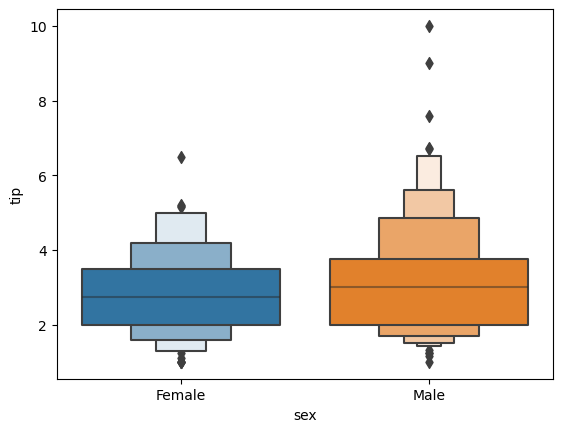

In [512]:
sns.boxenplot(x=sex, y=tip)
plt.show()

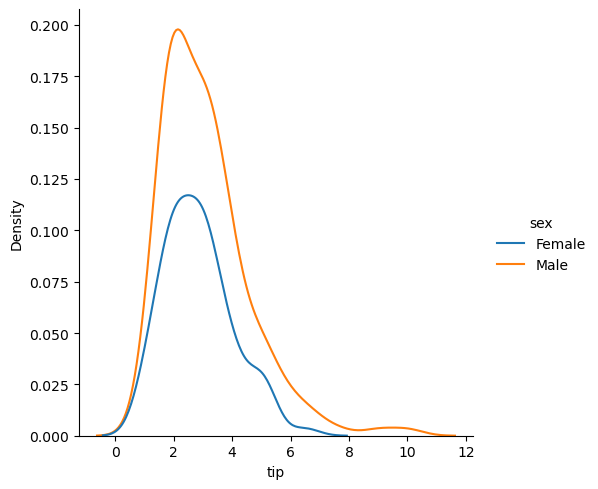

In [513]:
sns.displot(kind='kde', x=tip, hue=sex)
plt.show()

<Axes: xlabel='day', ylabel='tip'>

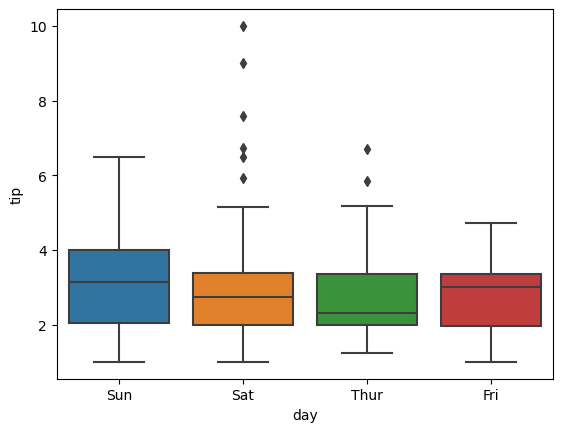

In [514]:
sns.boxplot(x=day, y=tip)

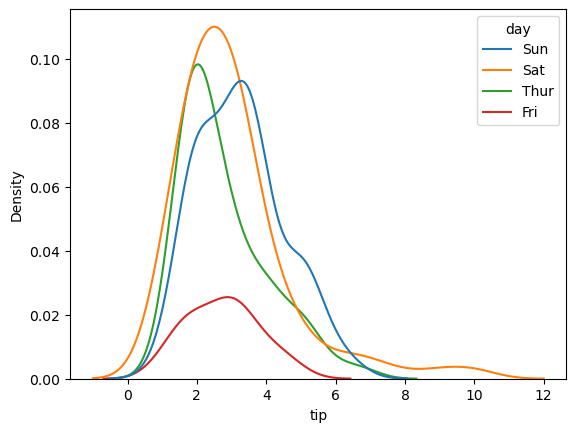

In [515]:
sns.kdeplot(x=tip, hue=day)
plt.show()

<Axes: xlabel='size', ylabel='tip'>

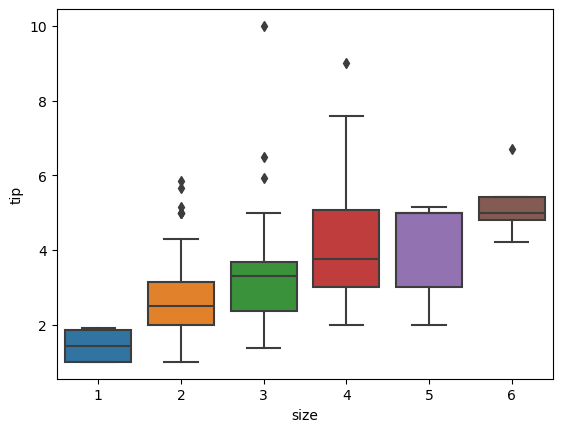

In [516]:
sns.boxplot(x=size, y=tip)

In [517]:
q1 = data['tip'].quantile(0.25)
q3 = data['tip'].quantile(0.75)
iqr_days = q3-q1

In [518]:
out_low_day = q1 - 1.5*iqr_days
out_high_day = q3 + 1.5*iqr_days

In [519]:
np.sum((data.loc[:, 'tip']>out_high_day) | (data.loc[:, 'tip']<out_low_day))

9

In [520]:
data['tip_outliers']=(data.loc[:, 'tip']>out_high_day) | (data.loc[:, 'tip']<out_low_day)
data

,total_bill,tip,sex,smoker,day,time,size,tip_outliers
0,16.99,1.01,Female,No,Sun,Dinner,2,False
1,10.34,1.66,Male,No,Sun,Dinner,3,False
2,21.01,3.50,Male,No,Sun,Dinner,3,False
3,23.68,3.31,Male,No,Sun,Dinner,2,False
4,24.59,3.61,Female,No,Sun,Dinner,4,False
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,True
240,27.18,2.00,Female,Yes,Sat,Dinner,2,False
241,22.67,2.00,Male,Yes,Sat,Dinner,2,False
242,17.82,1.75,Male,No,Sat,Dinner,2,False


In [521]:
outliers = (data.loc[:, 'tip']>out_high_day) | (data.loc[:, 'tip']<out_low_day)
data['tip'] = data['tip'].mask(outliers, data['tip'].mean())

In [522]:
#the outliers have been replaced with the average tip received!!
features = data.drop('tip' , axis =1)
data.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size',
       'tip_outliers'],
      dtype='object')

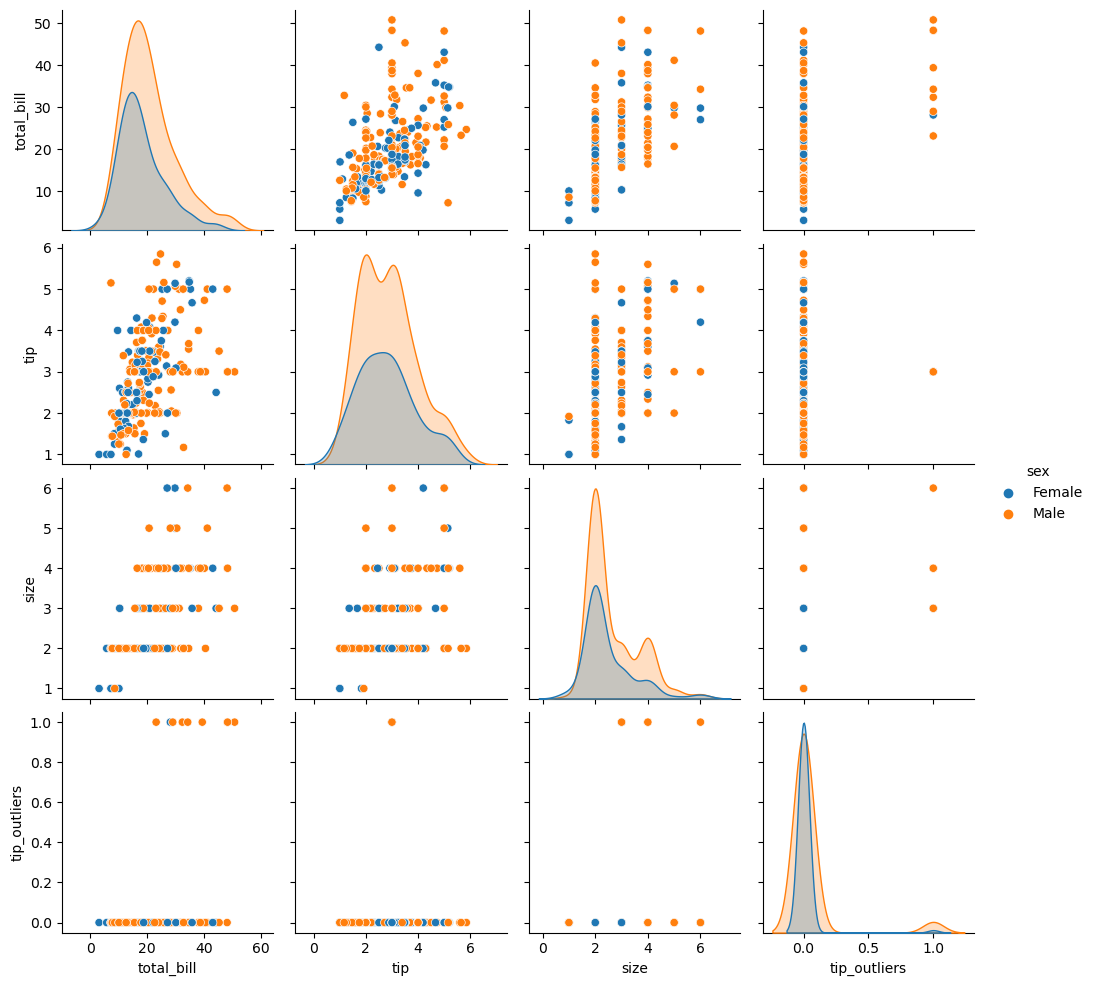

In [523]:
sns.pairplot(data, hue = 'sex')
plt.show()

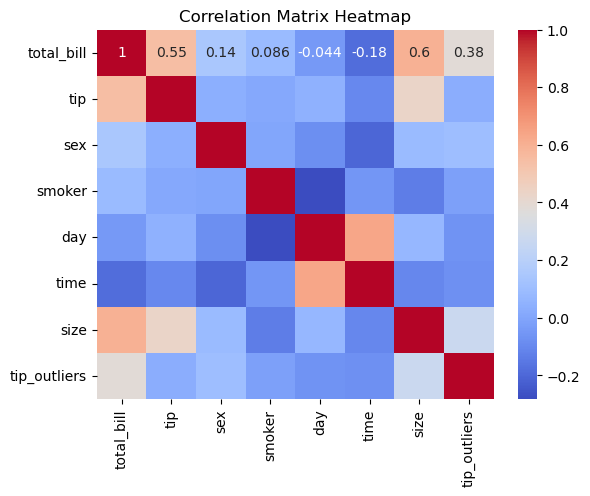

In [524]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['sex'] = label_encoder.fit_transform(data['sex'])  
data['smoker'] = label_encoder.fit_transform(data['smoker'])
data['day'] = label_encoder.fit_transform(data['day'])  # Encoding days (e.g., 'Sun' -> 3, 'Sat' -> 2)
data['time'] = label_encoder.fit_transform(data['time'])

correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


In [525]:
#from the above heatmap, it is clear that the tip amount does not depend much on sex, day, time and soking of the customer
data = data.drop(['time', 'sex', 'day', 'smoker', 'tip_outliers'] , axis =1 )
data.columns

Index(['total_bill', 'tip', 'size'], dtype='object')

In [526]:
data.head()

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4


In [527]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score , accuracy_score

In [528]:
data = pd.get_dummies(data, drop_first=True)
data

,total_bill,tip,size
0,16.99,1.010000,2
1,10.34,1.660000,3
2,21.01,3.500000,3
3,23.68,3.310000,2
4,24.59,3.610000,4
...,...,...,...
239,29.03,2.998279,3
240,27.18,2.000000,2
241,22.67,2.000000,2
242,17.82,1.750000,2


In [529]:
x = data.drop(columns='tip')
y = data['tip']

In [686]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [688]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

#Evaluating the model's performance
MSE = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print("R-squared(Coefficient of determination):", r2)
print("Mean Squared Error:", MSE)

R-squared(Coefficient of determination): 0.47360574267158306
Mean Squared Error: 0.6579777379766795


In [690]:
ridge = Ridge(alpha=1)
ridge.fit(x_train, y_train)
y_pred_ridge = ridge.predict(x_test)
print("\nRidge Regression:")
print("R2 Score:", r2_score(y_test, y_pred_ridge))
print("MSE:", mean_squared_error(y_test, y_pred_ridge))


Ridge Regression:
R2 Score: 0.47396341578044676
MSE: 0.6575306568396252


In [692]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)
print("\nDecision Tree Regression:")
print("R2 Score:", r2_score(y_test, y_pred_dt))
print("MSE:", mean_squared_error(y_test, y_pred_dt))


Decision Tree Regression:
R2 Score: 0.10588990020598321
MSE: 1.1176120042615274


In [694]:
lasso = Lasso(alpha=0.1)
lasso.fit(x_train, y_train)
y_pred_lasso = lasso.predict(x_test)
print("\nLasso Regression:")
print("R2 Score:", r2_score(y_test, y_pred_lasso))
print("MSE:", mean_squared_error(y_test, y_pred_lasso))


Lasso Regression:
R2 Score: 0.48700086744627535
MSE: 0.6412342158419602


In [696]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
print("\nRandom Forest Regression:")
print("R2 Score:", r2_score(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))


Random Forest Regression:
R2 Score: 0.32296112895943807
MSE: 0.846279188436551


In [698]:
svr = SVR(kernel='rbf')
svr.fit(x_train, y_train)
y_pred_svr = svr.predict(x_test)
print("\nSupport Vector Regression (SVR):")
print("R2 Score:", r2_score(y_test, y_pred_svr))
print("MSE:", mean_squared_error(y_test, y_pred_svr))


Support Vector Regression (SVR):
R2 Score: 0.4016128086607821
MSE: 0.7479668425522964


In [700]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
print("\nKNN Regression:")
print("R2 Score:", r2_score(y_test, y_pred_knn))
print("MSE:", mean_squared_error(y_test, y_pred_knn))


KNN Regression:
R2 Score: 0.3618197512509226
MSE: 0.7977070240554164


In [702]:
importances = rf.feature_importances_
features = x.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
print("\nFeature Importances (Random Forest):")
print(feature_importance_df.sort_values(by='Importance', ascending=False))


Feature Importances (Random Forest):
      Feature  Importance
0  total_bill    0.909832
1        size    0.090168


Analysing from the above data, we can say that in order to increase the tips, the restaurant should focus on the total bill and the size(no of members of that family). These 2 factors have a direct and higher impact on the tips provided. The sex , time and day does not correlate with the tips.